In [ ]:
!gdown 1aYtjMVlHvefrv_MWFbUy8W7Kh08wFrO-
import zipfile as zf
files=zf.ZipFile("/content/children with Dyslexia handwrite recognization.v1i.folder.zip",'r')
files.extractall()

Downloading...
From (original): https://drive.google.com/uc?id=1aYtjMVlHvefrv_MWFbUy8W7Kh08wFrO-
From (redirected): https://drive.google.com/uc?id=1aYtjMVlHvefrv_MWFbUy8W7Kh08wFrO-&confirm=t&uuid=9bdea855-bbde-45e2-b07e-7b615b907c5c
To: /content/children with Dyslexia handwrite recognization.v1i.folder.zip
100% 21.1M/21.1M [00:00<00:00, 57.7MB/s]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'train'
validation_dir = 'valid'
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

model.evaluate(validation_generator)


Found 17147 images belonging to 26 classes.
Found 1629 images belonging to 26 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


535/535 ━━━━━━━━━━━━━━━━━━━━ 112s 191ms/step - accuracy: 0.1489 - loss: 2.8449 - val_accuracy: 0.3531 - val_loss: 1.9365
Epoch 2/10
  1/535 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.0938 - loss: 2.8750

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


535/535 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0938 - loss: 2.8750 - val_accuracy: 0.4138 - val_loss: 1.5146
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 127s 180ms/step - accuracy: 0.3785 - loss: 1.9858 - val_accuracy: 0.6350 - val_loss: 1.1871
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.3438 - loss: 2.0401 - val_accuracy: 0.6897 - val_loss: 1.2414
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 141s 179ms/step - accuracy: 0.5449 - loss: 1.4666 - val_accuracy: 0.6856 - val_loss: 0.9853
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.6562 - loss: 1.0114 - val_accuracy: 0.5862 - val_loss: 0.9603
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 98s 180ms/step - accuracy: 0.6182 - loss: 1.2038 - val_accuracy: 0.7600 - val_loss: 0.7765
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 0s 44us/step - accuracy: 0.7188 - loss: 1.1739 - val_accuracy: 0.7241 - val_loss: 0.5576
Epoch 9/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 141s 179ms/step - accuracy: 0.6609 - loss: 1.0716 - val_accur

[0.7141361236572266, 0.7808471322059631]

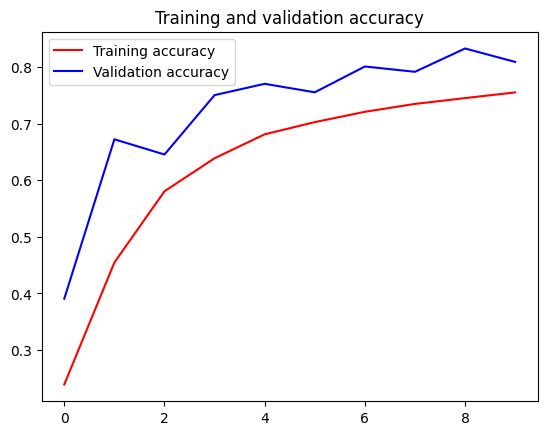

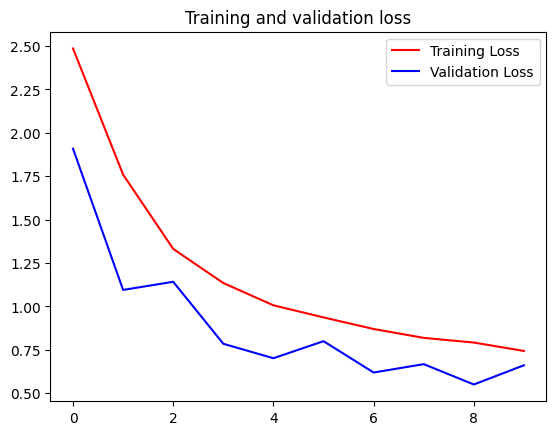

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_dir = 'test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
evaluation = model.evaluate(test_generator)
print(f"Evaluation loss: {evaluation[0]}")
print(f"Evaluation accuracy: {evaluation[1]}")

Found 814 images belonging to 26 classes.
26/26 [==============================] - 1s 33ms/step - loss: 0.7284 - accuracy: 0.7727
Evaluation loss: 0.7283969521522522
Evaluation accuracy: 0.7727272510528564


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

uploaded = files.upload()

image_path = next(iter(uploaded))
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
img = img.resize((150, 150))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model2.predict(img_array)
predicted_alphabet = chr(ord('a') + np.argmax(predictions))
print("Predicted alphabet:", predicted_alphabet)

In [ ]:
!gdown 1a3yLInSDYOsL_e1NcTQIFM0K4ybAvguh

Downloading...
From: https://drive.google.com/uc?id=1a3yLInSDYOsL_e1NcTQIFM0K4ybAvguh
To: /content/Dysgraphia model.zip
100% 9.29M/9.29M [00:00<00:00, 13.9MB/s]


In [ ]:
import zipfile as zf
import tensorflow as tf
files=zf.ZipFile("/content/Dysgraphia model.zip",'r')
files.extractall()
from tensorflow.keras.models import load_model

In [ ]:
model2=load_model('model_dysgraphia.hd5')